In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading data

PCA+Kmeans or MiniBatchKMeans, PCA+UMAP, 

In [2]:
path = r"C:\Users\matta\Desktop\Documents\Python\Geolocation\climate_data\working_data\labeled_climate_data.pkl"
df = pd.read_pickle(path)
df.shape

(481631, 122)

In [3]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace = True)
df.shape

(475432, 122)

In [4]:
features = list(set(list(df.columns)) - set(['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3']))

In [5]:
feature_df = df[features]
scaler = StandardScaler()
scaled_df = scaler.fit_transform(feature_df)

In [6]:
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = features
scaled_df[['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3']] = df[['longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3']]
scaled_df.shape

(475432, 122)

# PCA

In [7]:
pca = PCA(n_components=0.85)   
X_pca = pca.fit_transform(scaled_df[features])
pca_df = pd.DataFrame(X_pca)
print(pca_df.shape)
pca_df.head()

(475432, 3)


,0,1,2
0,-12.761944,-0.652603,-3.950904
1,-12.622421,-0.638251,-3.962709
2,-12.730934,-0.629976,-3.958815
3,-12.795600,-0.596917,-3.944603
4,-12.788173,-0.553994,-3.934088


In [8]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475432 entries, 0 to 475431
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       475432 non-null  float32
 1   1       475432 non-null  float32
 2   2       475432 non-null  float32
dtypes: float32(3)
memory usage: 5.4 MB


In [9]:
pca_df['longitude'], pca_df['latitude'], pca_df['Level_1'], pca_df['Level_2'], pca_df['Level_3'] = df['longitude'], df['latitude'], df['Level_1'], df['Level_2'], df['Level_3']
pca_df.shape

(475432, 8)

In [10]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475432 entries, 0 to 475431
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   0          475432 non-null  float32
 1   1          475432 non-null  float32
 2   2          475432 non-null  float32
 3   longitude  475432 non-null  float64
 4   latitude   475432 non-null  float64
 5   Level_1    475432 non-null  object 
 6   Level_2    475432 non-null  object 
 7   Level_3    475432 non-null  object 
dtypes: float32(3), float64(2), object(3)
memory usage: 23.6+ MB


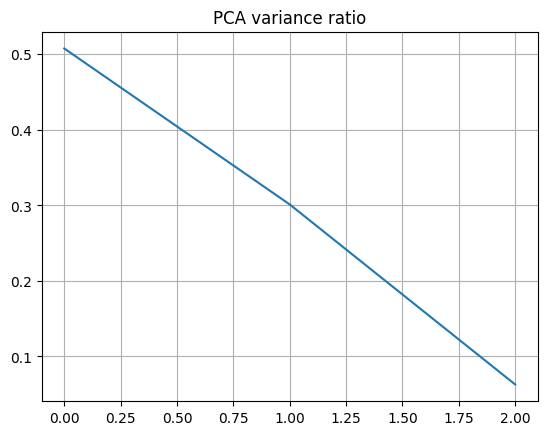

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.title('PCA variance ratio')
plt.grid()
plt.show()

In [12]:
pca_df.head()

,0,1,2,longitude,latitude,Level_1,Level_2,Level_3
0,-12.761944,-0.652603,-3.950904,-95.125000,49.416667,5 NORTHERN FORESTS,5.2 MIXED WOOD SHIELD,5.2.2 Northern Minnesota Wetlands
1,-12.622421,-0.638251,-3.962709,-95.166667,49.375000,5 NORTHERN FORESTS,5.2 MIXED WOOD SHIELD,5.2.2 Northern Minnesota Wetlands
2,-12.730934,-0.629976,-3.958815,-95.125000,49.375000,5 NORTHERN FORESTS,5.2 MIXED WOOD SHIELD,5.2.2 Northern Minnesota Wetlands
3,-12.795600,-0.596917,-3.944603,-95.083333,49.375000,5 NORTHERN FORESTS,5.2 MIXED WOOD SHIELD,5.2.2 Northern Minnesota Wetlands
4,-12.788173,-0.553994,-3.934088,-95.041667,49.375000,5 NORTHERN FORESTS,5.2 MIXED WOOD SHIELD,5.2.2 Northern Minnesota Wetlands


In [13]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475432 entries, 0 to 475431
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   0          475432 non-null  float32
 1   1          475432 non-null  float32
 2   2          475432 non-null  float32
 3   longitude  475432 non-null  float64
 4   latitude   475432 non-null  float64
 5   Level_1    475432 non-null  object 
 6   Level_2    475432 non-null  object 
 7   Level_3    475432 non-null  object 
dtypes: float32(3), float64(2), object(3)
memory usage: 23.6+ MB


In [14]:
pca_df.columns

Index([0, 1, 2, 'longitude', 'latitude', 'Level_1', 'Level_2', 'Level_3'], dtype='object')

In [15]:
pca_df.Level_1.unique()

array(['5  NORTHERN FORESTS', '7  MARINE WEST COAST FOREST',
       '6  NORTHWESTERN FORESTED MOUNTAINS', '10  NORTH AMERICAN DESERTS',
       '9  GREAT PLAINS', '0  WATER', '8  EASTERN TEMPERATE FORESTS',
       '11  MEDITERRANEAN CALIFORNIA', '13  TEMPERATE SIERRAS',
       '12  SOUTHERN SEMIARID HIGHLANDS', '15  TROPICAL WET FORESTS'],
      dtype=object)

In [16]:
pairs = list(itertools.combinations([0,1,2], 2))
print(pairs)

[(0, 1), (0, 2), (1, 2)]


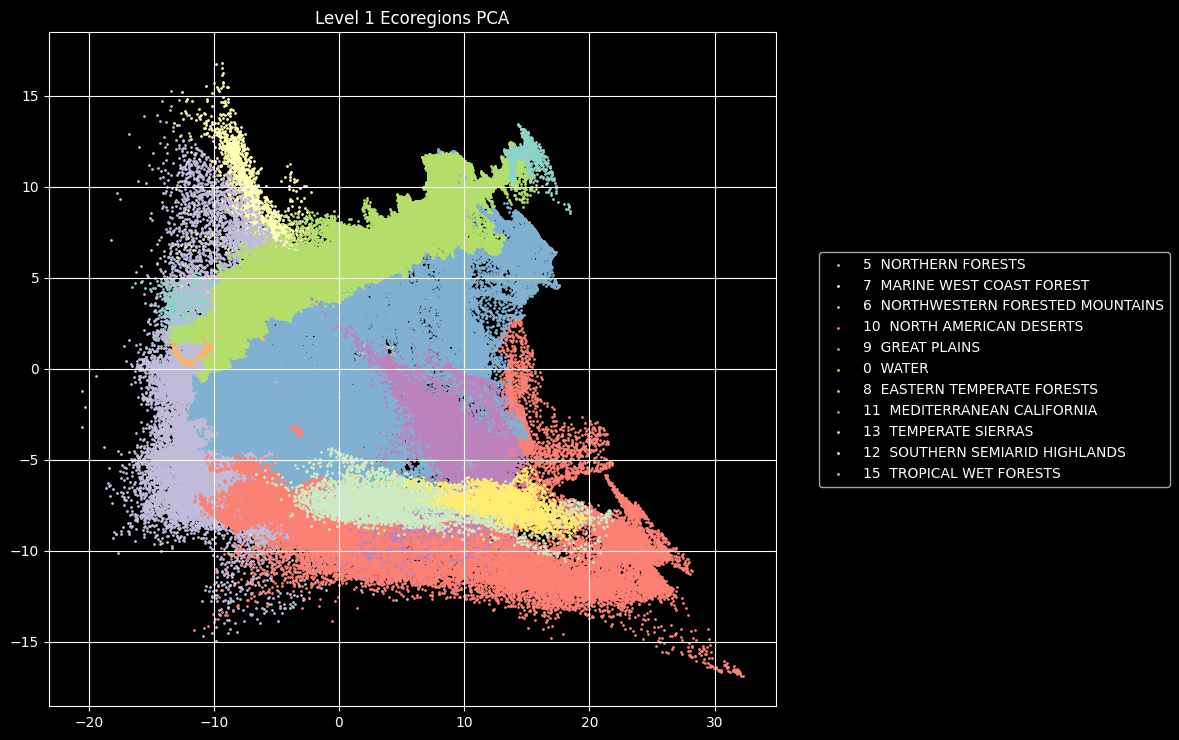

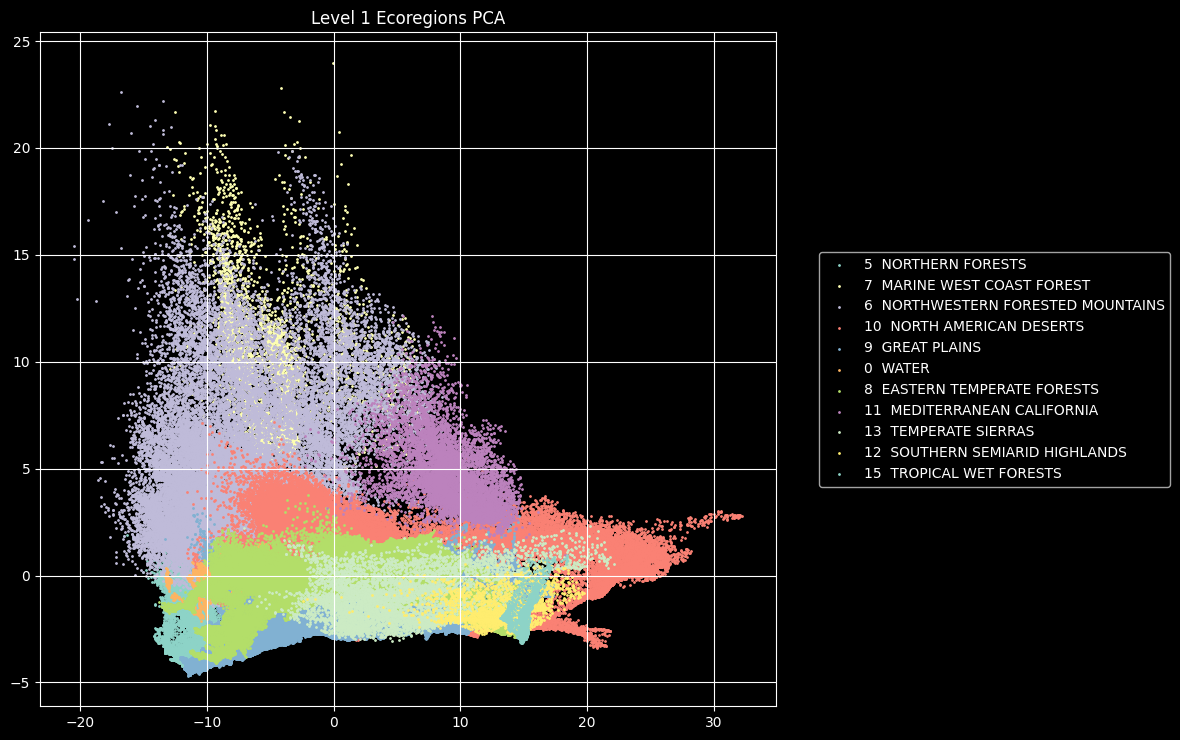

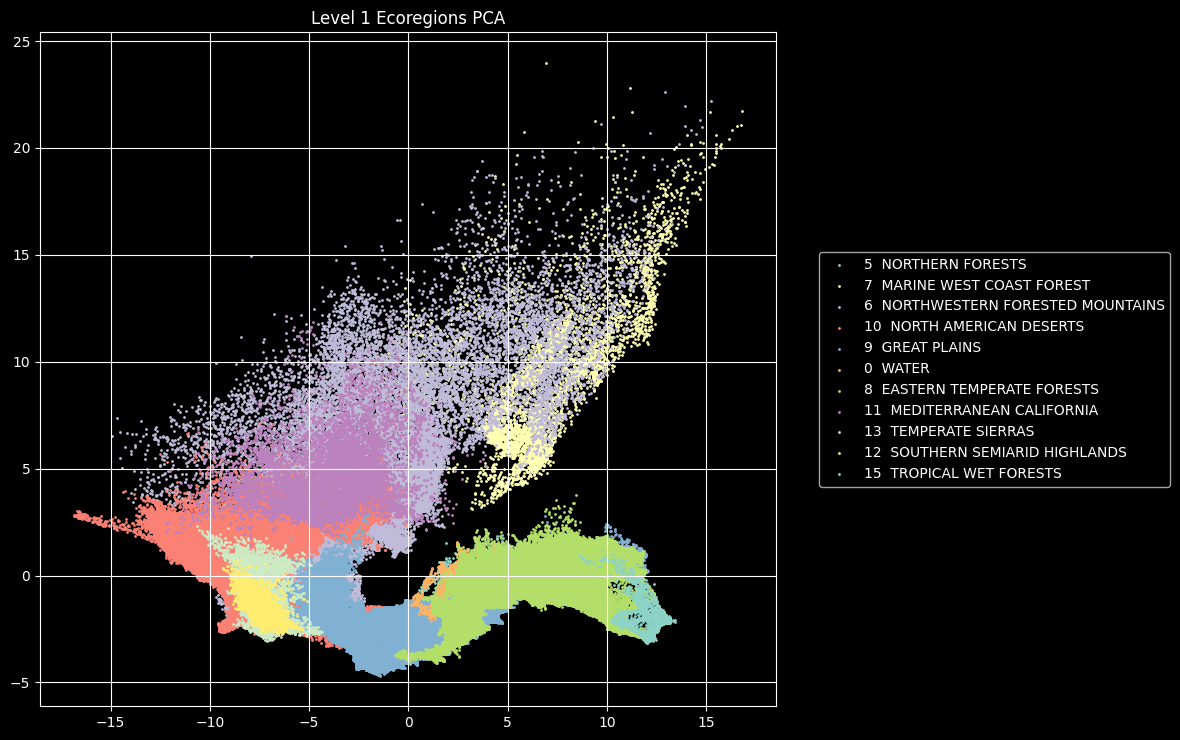

In [17]:
for i, j in pairs:
    plt.style.use("dark_background")
    plt.figure(figsize=(12,7.5))
    for k in pca_df.Level_1.unique():
        plt.scatter(pca_df[pca_df.Level_1 == k][i], pca_df[pca_df.Level_1 == k][j], s=1, label = k)
    plt.legend(
        bbox_to_anchor=(1.05, 0.5), 
        loc='center left')
    plt.grid()
    plt.title('Level 1 Ecoregions PCA')
    plt.tight_layout()
    plt.show()